In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
#Load Dataset
df = pd.read_csv("C:/Users/sande/Desktop/Autism_project/Genetic/AUTISM_GENE.csv")
df.head()


,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3


In [3]:
#Check for Null Values
print("Null values in each column:\n")
print(df.isnull().sum())


Null values in each column:

status                0
gene-symbol           0
gene-name             1
ensembl-id           13
chromosome            0
genetic-category      2
gene-score           81
syndromic             0
number-of-reports     0
dtype: int64


In [4]:
#Fill Missing Values
# Fill missing numeric values with mean
df['gene-score'] = df['gene-score'].fillna(df['gene-score'].mean())

# Fill missing categorical values with mode
df['gene-name'] = df['gene-name'].fillna(df['gene-name'].mode()[0])
df['genetic-category'] = df['genetic-category'].fillna(df['genetic-category'].mode()[0])
df['ensembl-id'] = df['ensembl-id'].fillna("Unknown")

# Drop rows where target (syndromic) is missing
df = df[df['syndromic'].notna()]


In [5]:
print(df.isnull().sum())

status               0
gene-symbol          0
gene-name            0
ensembl-id           0
chromosome           0
genetic-category     0
gene-score           0
syndromic            0
number-of-reports    0
dtype: int64


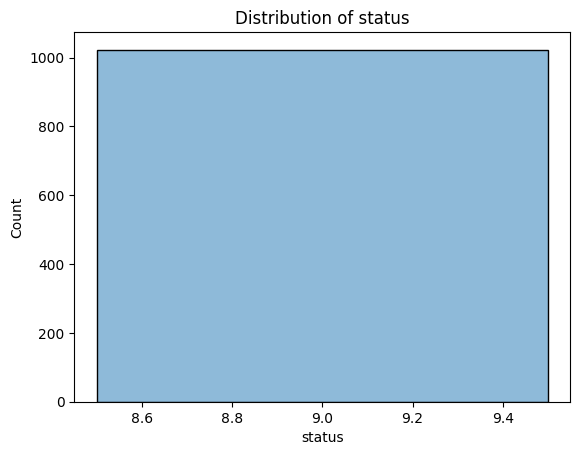

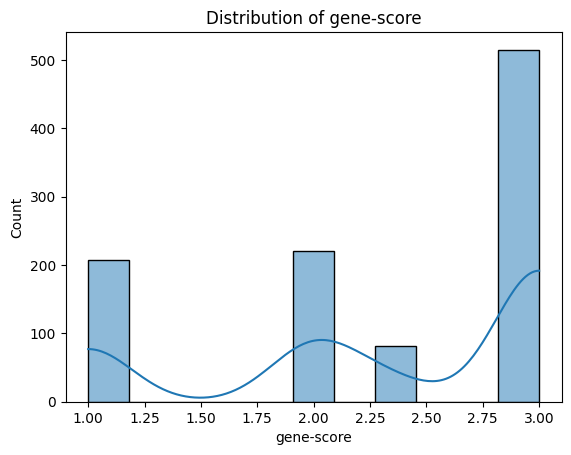

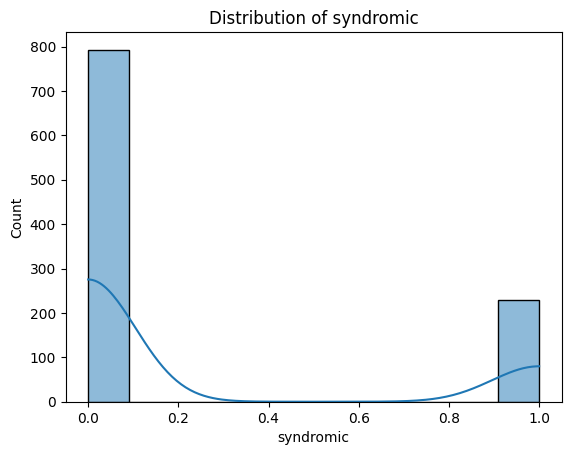

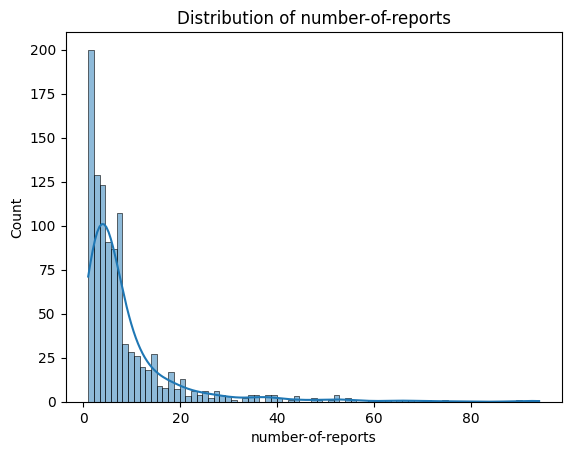

In [6]:
#Univariate Analysis
num_cols = ['status', 'gene-score', 'syndromic', 'number-of-reports']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


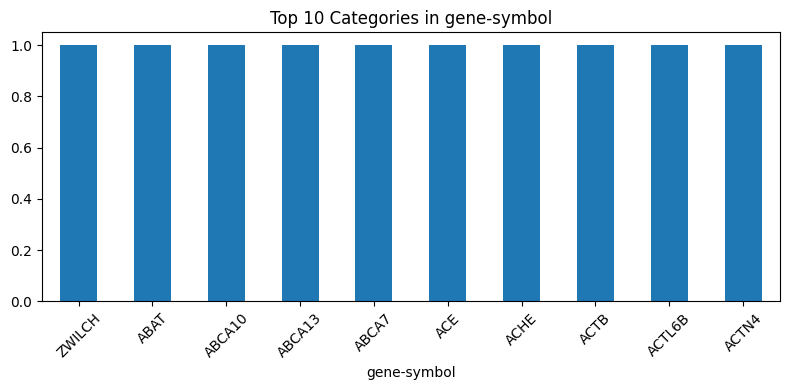

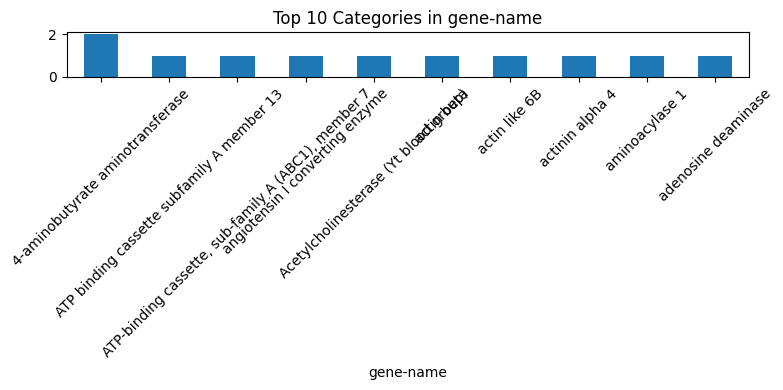

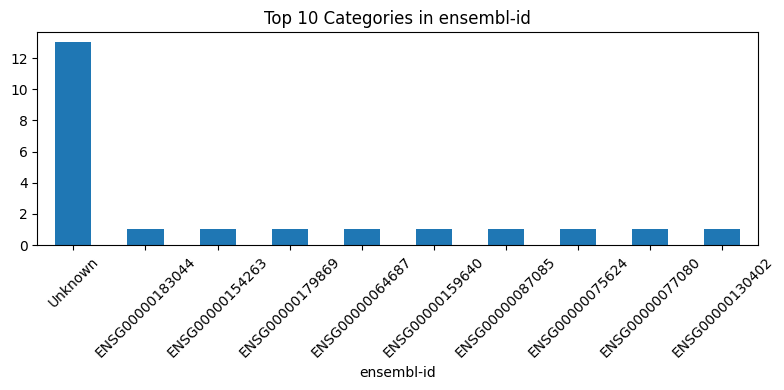

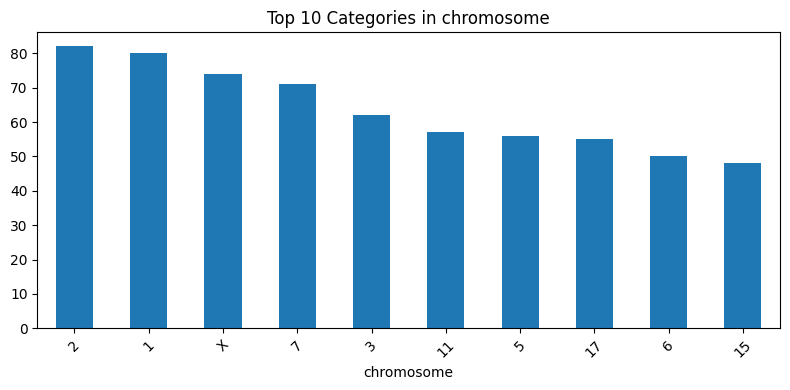

C:\Users\sande\AppData\Local\Temp\ipykernel_29800\2886692994.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


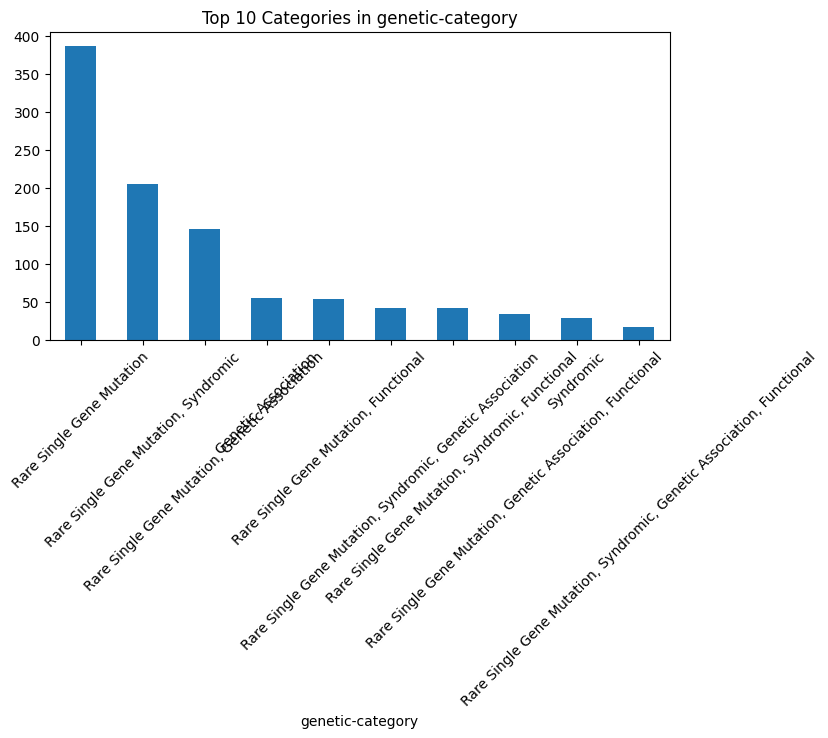

In [7]:
# Categorical Columns
cat_cols = ['gene-symbol', 'gene-name', 'ensembl-id', 'chromosome', 'genetic-category']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


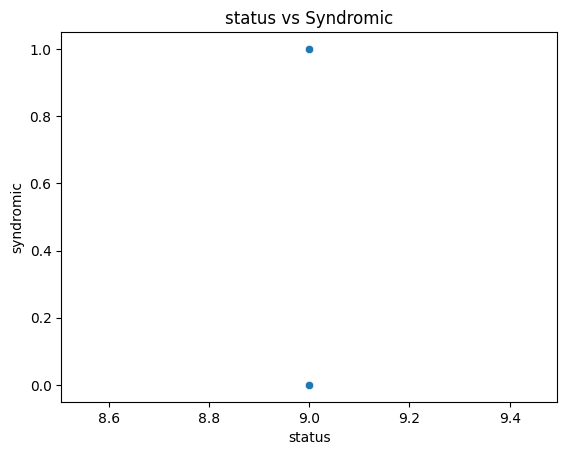

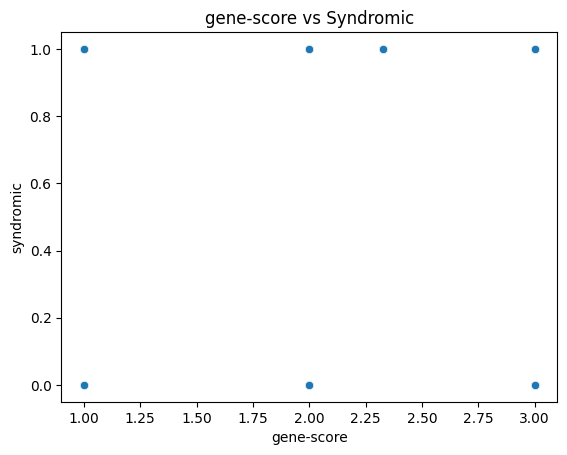

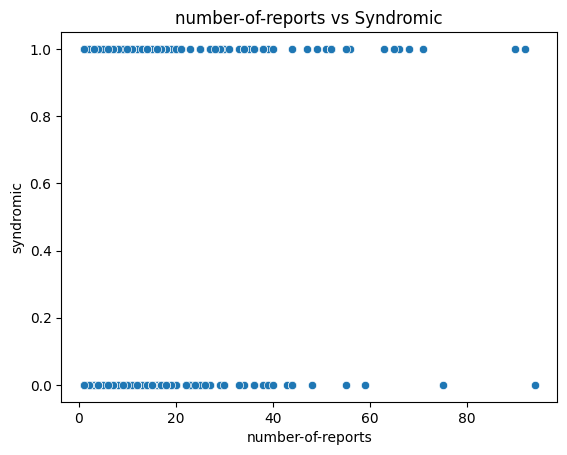

In [8]:
#Bivariate Analysis
for col in num_cols:
    if col != 'syndromic':
        plt.figure()
        sns.scatterplot(data=df, x=col, y='syndromic')
        plt.title(f'{col} vs Syndromic')
        plt.show()


In [9]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [10]:
df.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,0,0,835,7,5,3.0,0,5
1,9,1,14,581,8,3,3.0,0,1
2,9,2,13,806,19,4,3.0,0,6
3,9,3,15,59,10,3,3.0,0,4
4,9,4,463,631,8,5,3.0,0,3


In [32]:
df['genetic-category'].nunique()

14

In [12]:
df.shape

(1023, 9)

In [30]:
df['syndromic'].value_counts()

syndromic
0    793
1    230
Name: count, dtype: int64

In [29]:
df['ensembl-id'].nunique()

1010

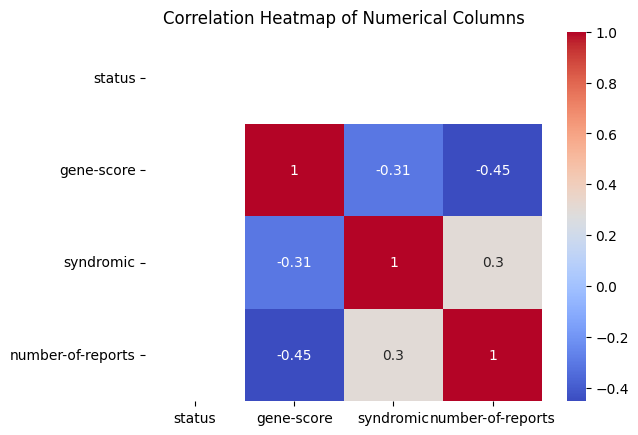

In [14]:
#Correlation Analysis
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


In [15]:
#Prepare Data for Modeling
X = df.drop('syndromic', axis=1)
y = df['syndromic']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Train & Evaluate Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.3809408302512072
Linear Regression MSE: 0.10939044365388546


In [17]:
#Train & Evaluate Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R²: 0.5334000134662
Random Forest MSE: 0.08245024390243903


In [36]:
sample = X_test.iloc[[5]]
print("Sample input:\n", sample)
print("Prediction:", rf_model.predict(sample))


Sample input:
      status  gene-symbol  gene-name  ensembl-id  chromosome  genetic-category  \
587       9          589        770         677          24                 6   

     gene-score  number-of-reports  
587         3.0                  5  
Prediction: [0.]


In [20]:
import joblib
joblib.dump(rf_model, "rf_autism_model.pkl")


['rf_autism_model.pkl']